## STAT 207 Lab 6: Central Limit Theorem and Confidence Intervals - [25 total points] - Solutions

Due: Wednesday, March 17 11:59pm CST <font color='green'>Happy St. Patrick's Day!</font>



## <u>Case Study</u>: U.S. County Home Ownership
In this lab we will explore the statistical concepts that we've learned this week while also examining the **homeownership rates** of the counties in the U.S. 

### Imports

In [15]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()                              # sets the default plotting style
import numpy as np

## 1. <u>Preliminaries</u>

### 1a. [0.5 pt] Read the county.csv into a dataframe, call it df, and display the first five rows.

Remember that 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.

In [16]:
df = pd.read_csv('county.csv', na_values=['data unavailable'])         #read the file
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


### 1b. [0.5pt] Display the shape of the dataframe.

In [17]:
print('Shape of the dataframe')
print(df.shape)

print('Number of rows in the dataframe')
print(df.shape[0])

print('Number of columns in the dataframe')
print(df.shape[1])

Shape of the dataframe
(3142, 15)
Number of rows in the dataframe
3142
Number of columns in the dataframe
15


### 1.c. [0.5 pt] How many missing values does the homeownership rate variable have?

In [18]:
df['homeownership'].isna().sum()

0

## 2. <u>Central Limit Theorem Exploration</u>

### 2.a. Population of County Homeownership Rates

Let's assume that the homeownership rate in this dataset represents a **population**, where the population is the homeownership rates of ALL counties in the U.S.

#### 2.a.i. [0.5 pt] Calculate the population mean and the population standard deviation homeownership rates.

In [19]:
mean = df['homeownership'].mean()
print("mean:", mean)

mean: 73.26645448758744


In [20]:
std = df['homeownership'].std()
print("std:", std)

std: 7.831929689986542


#### 2.a.ii  [0.5 pt] Plot the population distribution of homeownership rates.

Make sure you label your x-axis and title appropriately.

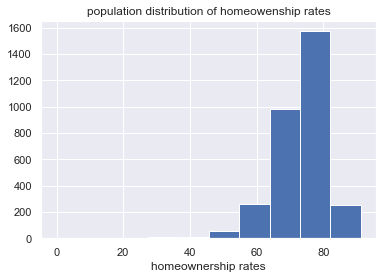

In [21]:
df['homeownership'].hist()
plt.title('population distribution of homeowenship rates')
plt.xlabel('homeownership rates')
plt.show()

### 2.b. Random Sample of County Homeownership Rates

#### 2.b.i. [1 pt] Collect a random sample of size 50 from this population (using a random state of 100) WITHOUT replacement.

In [22]:
sample1 = df.sample(50,replace = False, random_state = 100)

#### 2.b.ii.  [0.5 pt]  Calculate the mean and standard deviation of this sample.

In [23]:
mean1 = sample1['homeownership'].mean()
print("mean:", mean1)

mean: 74.978


In [24]:
std1 = sample1['homeownership'].std()
print("std:", std1)

std: 5.516220607981372


#### 2.b.iii.  [0.5 pt]  Plot the sample distribution.

Make sure that you label the x-axis and title appropriately.

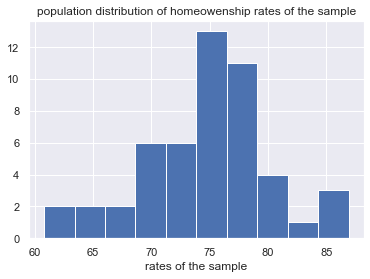

In [25]:
sample1['homeownership'].hist()
plt.title('population distribution of homeowenship rates of the sample')
plt.xlabel('rates of the sample')
plt.show()

### 2.c. Sampling Distribution

Suppose we were to create a sampling distribution with many, many sample means homeownership rates, where each sample was of size 50 (drawn with replacement from the population of all county homeownership rates).

#### 2.c.i.  [1 pt]  What is the mean of this sampling distribution?

(Not looking for you to *actually* create a sampling distribution. What is the theoretical mean of this sampling distribution?)

In [26]:
print("It should be the same as the whole data's mean which is :", mean)

It should be the same as the whole data's mean which is : 73.26645448758744


#### 2.c.ii.  [1 pt]  What is the standard deviation of this sampling distribution?

(Not looking for you to *actually* create a sampling distribution. What is the *theoretical* standard deviation of this sampling distribution?)

In [29]:
std_sd = std/np.sqrt(50)
print("It should be the same as the whole data's std which is :", std_sd)

It should be the same as the whole data's std which is : 1.1076021187131477


#### 2.c.iii.  [2 pt]  Will this sampling distribution of sample means be approximately normal? Explain why.

yes, because the each sample size is bigger than 30 and the population distribution is approximately normal

#### 2.c.iv.  [1 pt]  Calculate the probability that a randomly selected sample mean (from this sampling distribution) is greater than or equal to the sample mean that we calculated in (2.b). 

(You should assume in this case that you *do know* the population mean and standard deviation homeownership rates).

P(x>mean1)=1-P(x<=mean1)+p(x=mean1)

In [30]:
from scipy.stats import norm
1-norm.cdf(mean1, loc=mean, scale = std_sd)

0.06114035488311531

#### 2.c.v.  [0.5 pt]  What is the value of a sample mean that is the same distance away from the population mean that our sample mean from 2b is, but is *less than* the population mean)?

In [32]:
place = 0.5- (norm.cdf(mean1, loc=mean, scale = std_sd)-norm.cdf(mean, loc=mean, scale = std_sd))
value = norm.ppf(place,loc = mean,scale = std_sd)
value

71.55490897517488

#### 2.c.vi.  [1 pt] Calculate the probability that a randomly selected sample mean (from this sampling distribution) is less than or equal to the sample mean that we calculated in (2.c.v.). 

In [33]:
norm.cdf(value, loc=mean, scale = std_sd)

0.06114035488311526

## 3. Confidence Intervals for a Population Mean

While we technically have the population of all U.S. county homeownership rates (and can therefore calculate the population mean), we would still like to calculate a confidence interval to learn more about how confidence intervals behave. (By having a population, it allows us to "check" our answers to see how well our confidence intervals did.)

### 3.a. First, we would like to construct a *single* 92% confidence interval for the average homeownership rate of ALL U.S. counties.

#### 3.a.i.  [1 pt]  Check the conditions for creating a confidence interval for average homeownership rate of ALL U.S. counties.

1. it is a random sample
2. n = 50 < 10% the population size = 314.2
3. n > 30 and the population has a normal distribution

#### 3.a.ii.  [3 pt] Now create this 92% confidence interval using the random sample that you collected in 2b.

**ASSUME THAT YOU DO NOT KNOW WHAT THE POPULATION STANDARD DEVIATION HOMEOWNERSHIP RATE IS.**

In [38]:
cv = norm.ppf(0.96)
upper = mean1 + cv*std1/np.sqrt(50)
lower = mean1 - cv*std1/np.sqrt(50)
print(lower,",",upper)

73.61226983854657 , 76.34373016145342


#### 3.a.iii.  [1 pt]  Now interpret this confidence interval.

We are 92% confident that the average homeowner rate calculaed in 2b is between 73.61 and 76.34

#### 3.a.iv.  [1 pt]  Because we *actually* know the population mean home ownership rate, check whether this population mean falls within this confidence interval you just calculated.

In [34]:
mean

73.26645448758744

In [35]:
print('No, because 73.266 is not in the interval')

No, because 73.266 is not in the interval


<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### <u> Tutorial</u> ANDS and ORS in if-statements

We can check multiple conditions in an if-statement by using the 'and' and the 'or' operators as shown below.


In [23]:
a=20

if a < 30 and a>10:
    print('a is between 10 and 30')
else:
    print('otherwise')

a is between 10 and 30


In [24]:
if a >= 30 or a <=10:
    print('a is at most 10 or at least 30')
else:
    print('otherwise')

otherwise


<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 3.b. Next, let's construct 1000 92% confidence intervals for the average homeownership rate of ALL U.S. counties.

#### 3.b.i.  [2 pt] Create a function that does the following.
* <u>Input</u> The input for your function should take in the following values.
    - a lower bound of a confidence interval
    - an upper bound of a confidence interval
    - a population mean $\mu$
* <u>What it does</u>
    - Your function should check whether $lower \: bound\leq \mu\leq upper\: bound$.
    - If this is the case, it should return True
    - If this is not the case, then it should return False.

In [36]:
def confidence(lower_b, upper_b, mean):
    if(lower_b <= mean and upper_b >= mean):
        return True
    else:
        return False


#### 3.b.ii.  [1 pt]  Test your function out using the population mean and the confidence interval from 3a.

In [39]:
confidence(lower,upper,mean)

False

#### 3.b.iii.  [2 pt]  Using your function above to do the following:
* Collect 1000 random samples (each of size 50 without replacement) from the population of all U.S. county homeownership rates.
* Calculate the sample mean homeownership rate and sample standard deviation of each of these random samples.
* Create a 92% confidence interval around each of these sample means (assume that you don't know the population standard deviation).

What percent of these 1000 confidence intervals *actually* contained the population mean homeownership rate?

In [40]:
SampleMean = []
SampleStd = []
for i in range(1000):
    r_s = df['homeownership'].sample(50, replace = True)
    r_s_m = r_s.mean()
    r_s_std = r_s.std()
    SampleMean.append(r_s_m)
    SampleStd.append(r_s_std)

samplingM = pd.DataFrame({'mean':SampleMean})
samplingS = pd.DataFrame({'std':SampleStd})    

In [41]:
i=0
count = 0
cv = norm.ppf(0.96)

In [42]:
for i in range(1000):
    upper_rs = samplingM['mean'][i] + cv*samplingS['std'][i]/np.sqrt(50)
    lower_rs = samplingM['mean'][i] - cv*samplingS['std'][i]/np.sqrt(50)
    if(confidence(lower_rs,upper_rs,mean) == True):
        count = count+1

In [43]:
print(count/1000, 'of these 1000 confidence intervals actually contained the population homeownership rate')

0.91 of these 1000 confidence intervals actually contained the population homeownership rate


#### 3.b.iv.  [0.5 pt]  What is the difference between this percentage from (3.b.iii) and your confidence level?

In [44]:
print('the difference between the percentage calculated from 3.b.iii and my confidence level 92% is:',count/1000-0.92)

the difference between the percentage calculated from 3.b.iii and my confidence level 92% is: -0.010000000000000009


## 4. More Probability

### 4a.  [0.5 pt]  What is the probability that we randomly select a county from the population that has a homeownership rate that is below 50%?

In [46]:
percent_lower_than_50 = df[df['homeownership']<50].shape[0]/df.shape[0]
percent_lower_than_50

0.012412476129853597

### 4.b. *Suppose* were to collect a random sample of 7 counties from the population of U.S. counties (with replacement). 

Don't *actually* take a random sample. This is a *theoretical* math problem.

#### 4.b.i.  [1 pt] What is the probability that 2 of these counties have a homeownership rate that is below 50%?

In [47]:
b = (percent_lower_than_50**2)*(1-percent_lower_than_50)**5*7*3
b

0.0030395838040947337

#### 4.b.ii.  [1 pt]  What is the probability that at most 2 counties have a homeownership rate that is below 50%?

In [52]:
(percent_lower_than_50**1)*(1-percent_lower_than_50)**6*7+b+(percent_lower_than_50**0)*(1-percent_lower_than_50)**7

0.9999355220934942

P(0)+P(1)+P(2)=0.9999